In [2]:
import pandas as pd


# Importieren der Daten: 
df = pd.read_csv("tweets_Fallstudie.csv")

df



,Unnamed: 0,text,id,author_id,created_at
0,0,Jumping on someone podcast soon. Maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z
1,1,It's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z
2,2,We need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z
3,3,Our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z
4,4,YES WE DID!!! https://t.co/OiWm2GEt18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z
5,5,"🤔. “In the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z
6,6,Congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z
7,7,Ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dHh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z


In [3]:
# Wir schauen uns zuerst die Informationen des Dataframes an 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8 non-null      int64 
 1   text        8 non-null      object
 2   id          8 non-null      int64 
 3   author_id   8 non-null      int64 
 4   created_at  8 non-null      object
dtypes: int64(3), object(2)
memory usage: 448.0+ bytes


In [4]:
# Wir transformieren alles in der Spalte text in Kleinbuchstaben, da es so einfacher ist damit zu arbeiten. 
df['text'] = df['text'].astype(str).str.lower()


In [5]:
# Wir zerlegen die Zeichenkette (=Text) mit Hilfe eines regulären Ausdrucks un Teilzeichenkette (=text_toxen)


from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+') 
df['text_token']=df['text'].apply(regexp.tokenize)

df



,Unnamed: 0,text,id,author_id,created_at,text_token
0,0,jumping on someone podcast soon. maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m..."
1,1,it's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba..."
2,2,we need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ..."
3,3,our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,..."
4,4,yes we did!!! https://t.co/oiwm2get18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]"
5,5,"🤔. “in the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ..."
6,6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o..."
7,7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]"


In [6]:
# wir importieren das natural language toolkit der Standford University, um Textmining zu betreiben und die Erkenntnisse zu visualisieren. 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafaela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# wir importieren das Paket "stopwords", welches wichtig ist, um Wörter entfernen zu können. Das Paket beinhaltet typische Wörter wie “the”, “of”, “to”.
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Wir erstellen eine Liste mit den Wörtern die wir entfernen wollen: 
my_stopwords = ['https',"t","co","1ac2oyfv6m","2chzznfrjx","oiwm2get18","bpq5qsonfo","2gwv3ff81p", "gxj6zf0dhh"]


stopwords.extend(my_stopwords)

In [8]:
# Entfernt die Stopwords 
df['text_token_stopwords'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

df

,Unnamed: 0,text,id,author_id,created_at,text_token,text_token_stopwords
0,0,jumping on someone podcast soon. maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m...","[jumping, someone, podcast, soon, maybe]"
1,1,it's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba...","[funny, many, basketball, experts, app, everyb..."
2,2,we need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ...","[need, come, together, help, whatever, possibl..."
3,3,our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,...","[condolences, goes, family, lost, loved, one, ..."
4,4,yes we did!!! https://t.co/oiwm2get18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]",[yes]
5,5,"🤔. “in the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ...","[face, impossible, odds, people, love, country..."
6,6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o...","[congratulations, brother]"
7,7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]",[ayyyyyeeee]


In [9]:
# Alle Wörter werden zu einem String 

df['text_string'] = df['text_token_stopwords'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

all_words = ''.join([word for word in df["text_string"]])

all_words

'jumping someone podcast soon maybefunny many basketball experts app everybody dr james naismith fascinatingneed come together help whatever possibly bring bg home quickly safely voice athletes stronger together uninterrupted wearebgcondolences goes family lost loved one heavens watch tragedy pray communityyesface impossible odds people love country change barack obamacongratulations brotherayyyyyeeee'

In [10]:
# wir machen aus dem String eine Liste 
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [11]:
# mit FreqDist erstellen wir eine Häufikeitsverteilung; Wir zählen wie oft die Wörter vorkommen 
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'together': 2, 'jumping': 1, 'someone': 1, 'podcast': 1, 'soon': 1, 'maybefunny': 1, 'many': 1, 'basketball': 1, 'experts': 1, 'app': 1, ...})

In [12]:
# Wir filtern nun die Wörter raus, welche mehr als 1 Mal vorkommen 
df['text_string_fdist'] = df['text_token_stopwords'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

df

,Unnamed: 0,text,id,author_id,created_at,text_token,text_token_stopwords,text_string,text_string_fdist
0,0,jumping on someone podcast soon. maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m...","[jumping, someone, podcast, soon, maybe]",jumping someone podcast soon maybe,jumping someone podcast soon
1,1,it's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba...","[funny, many, basketball, experts, app, everyb...",funny many basketball experts app everybody dr...,many basketball experts app everybody dr james...
2,2,we need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ...","[need, come, together, help, whatever, possibl...",need come together help whatever possibly brin...,come together help whatever possibly bring bg ...
3,3,our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,...","[condolences, goes, family, lost, loved, one, ...",condolences goes family lost loved one heavens...,goes family lost loved one heavens watch trage...
4,4,yes we did!!! https://t.co/oiwm2get18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]",[yes],yes,
5,5,"🤔. “in the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ...","[face, impossible, odds, people, love, country...",face impossible odds people love country chang...,impossible odds people love country change barack
6,6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o...","[congratulations, brother]",congratulations brother,
7,7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]",[ayyyyyeeee],ayyyyyeeee,


In [13]:
# Wordnet ist eine Art Wortdatenbank mit englischen Substantiven, Adjektiven, Adverbien und Verben, welche in eine Reihe von kognitiven Synonymen gruppiert
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/rafaela/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rafaela/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
# Mit Lemmatizer kann man Wörter welche aus der gleichen Wortfamilie stammen, gruppieren.
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)


In [15]:
# Manchmal gibt es keine Wörter aus der gleichen Wortfamilie, deswegen prüfen wir, ob es in unserem Datensatz welche gibt: 

df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

# Es wurden 8 gleiche Wörter gefunden 
df.is_equal.value_counts()



True    8
Name: is_equal, dtype: int64

In [16]:
df

,Unnamed: 0,text,id,author_id,created_at,text_token,text_token_stopwords,text_string,text_string_fdist,text_string_lem,is_equal
0,0,jumping on someone podcast soon. maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m...","[jumping, someone, podcast, soon, maybe]",jumping someone podcast soon maybe,jumping someone podcast soon,jumping someone podcast soon,True
1,1,it's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba...","[funny, many, basketball, experts, app, everyb...",funny many basketball experts app everybody dr...,many basketball experts app everybody dr james...,many basketball experts app everybody dr james...,True
2,2,we need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ...","[need, come, together, help, whatever, possibl...",need come together help whatever possibly brin...,come together help whatever possibly bring bg ...,come together help whatever possibly bring bg ...,True
3,3,our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,...","[condolences, goes, family, lost, loved, one, ...",condolences goes family lost loved one heavens...,goes family lost loved one heavens watch trage...,goes family lost loved one heavens watch trage...,True
4,4,yes we did!!! https://t.co/oiwm2get18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]",[yes],yes,,,True
5,5,"🤔. “in the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ...","[face, impossible, odds, people, love, country...",face impossible odds people love country chang...,impossible odds people love country change barack,impossible odds people love country change barack,True
6,6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o...","[congratulations, brother]",congratulations brother,,,True
7,7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]",[ayyyyyeeee],ayyyyyeeee,,,True


In [17]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
# wir schaffen eine Wortcloud:

all_words_lem = ' '.join([word for word in df['text_string_lem']])

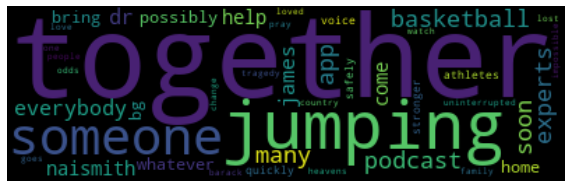

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, 
                     height=125, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

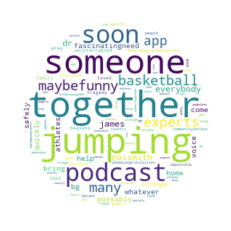

In [20]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [21]:
# “Punkt" ist ein Teil der Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rafaela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [23]:
# wir geben die drei Wörter aus die am meisten vorkommen 
fd.most_common(3)

[('together', 2), ('jumping', 1), ('someone', 1)]

In [24]:
# wir geben die drei Wörter aus welche am meisten vorkommen in Form einer Tabelle 
fd.tabulate(3)

together  jumping  someone 
       2        1        1 


In [25]:
# Wir geben die drei Wörter aus welche am meisten vorkommen und speichern sie in der Variable top_10 
top_10 = fd.most_common(10)

# Wir erstellen eine Panda-Serie, um einen Plot zu erstellen 
fdist = pd.Series(dict(top_10))

top_10

[('together', 2),
 ('jumping', 1),
 ('someone', 1),
 ('podcast', 1),
 ('soon', 1),
 ('many', 1),
 ('basketball', 1),
 ('experts', 1),
 ('app', 1),
 ('everybody', 1)]

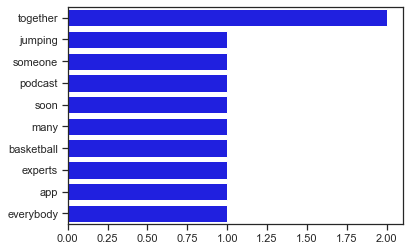

In [26]:
# mit Seaborn können wir Plots erstellen 

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [27]:
# andere Möglichkeit Plots zu erstellen 
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sortieren nach Häufigkeit 
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# Zeige Plot an 
fig.show()

In [28]:
# gibt die Häufigkeit von "toghether" aus
fd["together"]

2

In [29]:
# Vader = Valence Aware Dictionary and sEntiment Reasoner analysiert Stimmungen bzw. die Polaritäten positiv/negativ/neutral 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rafaela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [31]:
# wir erzeugen eine neue Spalte, um die Polirität zu sehen 

df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))


df

,Unnamed: 0,text,id,author_id,created_at,text_token,text_token_stopwords,text_string,text_string_fdist,text_string_lem,is_equal,polarity
0,0,jumping on someone podcast soon. maybe my own 🤔,1533632259755896832,23083404,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m...","[jumping, someone, podcast, soon, maybe]",jumping someone podcast soon maybe,jumping someone podcast soon,jumping someone podcast soon,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,it's so funny to me how many basketball expert...,1533632033972310016,23083404,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba...","[funny, many, basketball, experts, app, everyb...",funny many basketball experts app everybody dr...,many basketball experts app everybody dr james...,many basketball experts app everybody dr james...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,we need to come together and help do whatever ...,1533599792701378560,23083404,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ...","[need, come, together, help, whatever, possibl...",need come together help whatever possibly brin...,come together help whatever possibly bring bg ...,come together help whatever possibly bring bg ...,True,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp..."
3,3,our condolences goes out to the family who los...,1532754469728837633,23083404,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,...","[condolences, goes, family, lost, loved, one, ...",condolences goes family lost loved one heavens...,goes family lost loved one heavens watch trage...,goes family lost loved one heavens watch trage...,True,"{'neg': 0.342, 'neu': 0.204, 'pos': 0.454, 'co..."
4,4,yes we did!!! https://t.co/oiwm2get18,1532225483596738560,23083404,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]",[yes],yes,,,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
5,5,"🤔. “in the face of impossible odds, people who...",1531837452591042561,23083404,2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ...","[face, impossible, odds, people, love, country...",face impossible odds people love country chang...,impossible odds people love country change barack,impossible odds people love country change barack,True,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
6,6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,1531784889279795201,23083404,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o...","[congratulations, brother]",congratulations brother,,,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
7,7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,1531260582657138688,23083404,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]",[ayyyyyeeee],ayyyyyeeee,,,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [32]:
# Verändern des Dataframes und gibt die Polairät jeder einzelner Spalte aus 
df = pd.concat(
    [df.drop(['Unnamed: 0', 'id', 'author_id', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)



In [33]:
# Wir erstellen eine neue Variable "sentiment"

df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'negative' if x==0 else 'neutral')

df



,text,created_at,text_token,text_token_stopwords,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,jumping on someone podcast soon. maybe my own 🤔,2022-06-06T02:09:58.000Z,"[jumping, on, someone, podcast, soon, maybe, m...","[jumping, someone, podcast, soon, maybe]",jumping someone podcast soon maybe,jumping someone podcast soon,jumping someone podcast soon,True,0.000,1.000,0.000,0.0000,negative
1,it's so funny to me how many basketball expert...,2022-06-06T02:09:05.000Z,"[it, s, so, funny, to, me, how, many, basketba...","[funny, many, basketball, experts, app, everyb...",funny many basketball experts app everybody dr...,many basketball experts app everybody dr james...,many basketball experts app everybody dr james...,True,0.000,1.000,0.000,0.0000,negative
2,we need to come together and help do whatever ...,2022-06-06T00:00:58.000Z,"[we, need, to, come, together, and, help, do, ...","[need, come, together, help, whatever, possibl...",need come together help whatever possibly brin...,come together help whatever possibly bring bg ...,come together help whatever possibly bring bg ...,True,0.000,0.585,0.415,0.8176,positive
3,our condolences goes out to the family who los...,2022-06-03T16:01:57.000Z,"[our, condolences, goes, out, to, the, family,...","[condolences, goes, family, lost, loved, one, ...",condolences goes family lost loved one heavens...,goes family lost loved one heavens watch trage...,goes family lost loved one heavens watch trage...,True,0.342,0.204,0.454,0.2960,positive
4,yes we did!!! https://t.co/oiwm2get18,2022-06-02T04:59:57.000Z,"[yes, we, did, https, t, co, oiwm2get18]",[yes],yes,,,True,0.000,0.000,0.000,0.0000,negative
5,"🤔. “in the face of impossible odds, people who...",2022-06-01T03:18:03.000Z,"[in, the, face, of, impossible, odds, people, ...","[face, impossible, odds, people, love, country...",face impossible odds people love country chang...,impossible odds people love country change barack,impossible odds people love country change barack,True,0.000,0.588,0.412,0.6369,positive
6,congratulations brother!!! 👏🏾👏🏾👏🏾👏🏾 🙏🏾✊🏾🤎👑 htt...,2022-05-31T23:49:11.000Z,"[congratulations, brother, https, t, co, 1ac2o...","[congratulations, brother]",congratulations brother,,,True,0.000,0.000,0.000,0.0000,negative
7,ayyyyyeeee!!!! 😤😤😤 https://t.co/gxj6zf0dhh,2022-05-30T13:05:47.000Z,"[ayyyyyeeee, https, t, co, gxj6zf0dhh]",[ayyyyyeeee],ayyyyyeeee,,,True,0.000,0.000,0.000,0.0000,negative


In [34]:
# Tweet mit höchstem postivien Sentiment
df.loc[df['compound'].idxmax()].values

array(['we need to come together and help do whatever we possibly can to bring bg home quickly and safely!! 🙏🏾 our voice as athletes is stronger together. @uninterrupted 👑 #wearebg https://t.co/2gwv3ff81p',
       '2022-06-06T00:00:58.000Z',
       list(['we', 'need', 'to', 'come', 'together', 'and', 'help', 'do', 'whatever', 'we', 'possibly', 'can', 'to', 'bring', 'bg', 'home', 'quickly', 'and', 'safely', 'our', 'voice', 'as', 'athletes', 'is', 'stronger', 'together', 'uninterrupted', 'wearebg', 'https', 't', 'co', '2gwv3ff81p']),
       list(['need', 'come', 'together', 'help', 'whatever', 'possibly', 'bring', 'bg', 'home', 'quickly', 'safely', 'voice', 'athletes', 'stronger', 'together', 'uninterrupted', 'wearebg']),
       'need come together help whatever possibly bring bg home quickly safely voice athletes stronger together uninterrupted wearebg',
       'come together help whatever possibly bring bg home quickly safely voice athletes stronger together uninterrupted',
       'com

In [35]:
# Tweet mit hächstem negativen Sentiment
df.loc[df['compound'].idxmin()].values

array(['jumping on someone podcast soon. maybe my own 🤔',
       '2022-06-06T02:09:58.000Z',
       list(['jumping', 'on', 'someone', 'podcast', 'soon', 'maybe', 'my', 'own']),
       list(['jumping', 'someone', 'podcast', 'soon', 'maybe']),
       'jumping someone podcast soon maybe',
       'jumping someone podcast soon', 'jumping someone podcast soon',
       True, 0.0, 1.0, 0.0, 0.0, 'negative'], dtype=object)

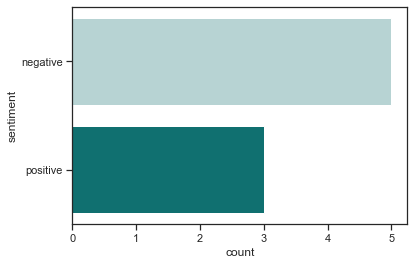

In [36]:
# Plot in welchem gezählt wird, wie oft Tweets positiv bzw. negativ sind 
sns.countplot(y='sentiment', 
             data= df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

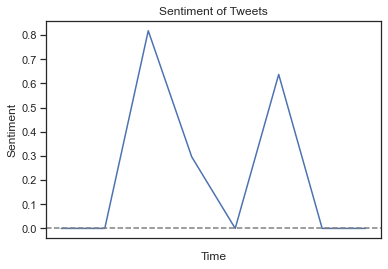

In [37]:
# Lineplot mit den verschiedenen Stimmungen 
g = sns.lineplot(x='created_at', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

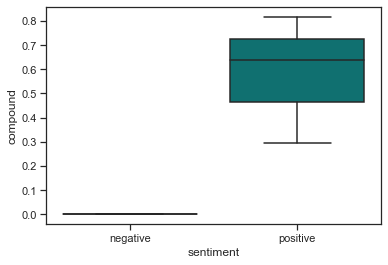

In [38]:
 
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

In [39]:
df.to_csv("/Users/rafaela/test/streamlit-app/1-first-app/FallStudie2_Daten.csv")